# Problem Set 3: ANN | Handwritten Digit Recognition on the MNIST dataset

AI 211 | 2nd Sem AY 2023-2024

Students:  
Joshua Cantor  
Michael Spencer Quinto


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import seaborn as sns
import warnings

from numpy import ndarray
from typing import Optional
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True, threshold=30)
pd.set_option("display.max_columns", 50)

In [3]:
mnist = scipy.io.loadmat("../raw-data/mnist.mat")
X: ndarray = mnist["X"]
y: ndarray = mnist["y"]

In [4]:
display(X.shape)
display(y.shape)

(5000, 400)

(5000, 1)

In [5]:
display(X[0])
display(X[0].shape)

array([0., 0., 0., ..., 0., 0., 0.])

(400,)

# MNIST Dataframe


In [6]:
s = np.hstack((y, X))
mnist_df = pd.DataFrame(s, columns=["y"] + [f"px_{i}" for i in range(400)])
display(mnist_df.head(2))
display(mnist_df.iloc[500:502])

,y,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,px_10,px_11,px_12,px_13,px_14,px_15,px_16,px_17,px_18,px_19,px_20,px_21,px_22,px_23,...,px_375,px_376,px_377,px_378,px_379,px_380,px_381,px_382,px_383,px_384,px_385,px_386,px_387,px_388,px_389,px_390,px_391,px_392,px_393,px_394,px_395,px_396,px_397,px_398,px_399
0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,y,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,px_10,px_11,px_12,px_13,px_14,px_15,px_16,px_17,px_18,px_19,px_20,px_21,px_22,px_23,...,px_375,px_376,px_377,px_378,px_379,px_380,px_381,px_382,px_383,px_384,px_385,px_386,px_387,px_388,px_389,px_390,px_391,px_392,px_393,px_394,px_395,px_396,px_397,px_398,px_399
500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mnist_df["y"].value_counts()

y
10.0    500
1.0     500
2.0     500
3.0     500
4.0     500
5.0     500
6.0     500
7.0     500
8.0     500
9.0     500
Name: count, dtype: int64

In [8]:
# replace 10 with 0, the actual class label for the number zero
mnist_df["y"] = mnist_df["y"].replace(10, 0)
display(mnist_df.head(2))
display(mnist_df["y"].value_counts())

,y,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,px_10,px_11,px_12,px_13,px_14,px_15,px_16,px_17,px_18,px_19,px_20,px_21,px_22,px_23,...,px_375,px_376,px_377,px_378,px_379,px_380,px_381,px_382,px_383,px_384,px_385,px_386,px_387,px_388,px_389,px_390,px_391,px_392,px_393,px_394,px_395,px_396,px_397,px_398,px_399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


y
0.0    500
1.0    500
2.0    500
3.0    500
4.0    500
5.0    500
6.0    500
7.0    500
8.0    500
9.0    500
Name: count, dtype: int64

# Train-Validation Split


In [9]:
X_df = mnist_df.drop(columns=["y"])
y_df = mnist_df["y"]
raw_split: list[pd.DataFrame] = train_test_split(
    X_df,
    y_df,
    test_size=0.30,
    random_state=41,
)

X_train, X_val, y_train, y_val = raw_split

print("Training feature set shape:", X_train.shape)
print("Validation feature set shape:", X_val.shape)
print("Training target set shape:", y_train.shape)
print("Validation target set shape:", y_val.shape)

Training feature set shape: (3500, 400)
Validation feature set shape: (1500, 400)
Training target set shape: (3500,)
Validation target set shape: (1500,)


In [10]:
display(X_train.head(2))
display(y_train.head(2))

,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,px_10,px_11,px_12,px_13,px_14,px_15,px_16,px_17,px_18,px_19,px_20,px_21,px_22,px_23,px_24,...,px_375,px_376,px_377,px_378,px_379,px_380,px_381,px_382,px_383,px_384,px_385,px_386,px_387,px_388,px_389,px_390,px_391,px_392,px_393,px_394,px_395,px_396,px_397,px_398,px_399
3065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3065    6.0
3348    6.0
Name: y, dtype: float64

In [11]:
display(y_train.value_counts(normalize=True).sort_index())
display(y_val.value_counts(normalize=True).sort_index())

y
0.0    0.100000
1.0    0.100857
2.0    0.100286
3.0    0.100286
4.0    0.101714
5.0    0.095714
6.0    0.100000
7.0    0.101143
8.0    0.099143
9.0    0.100857
Name: proportion, dtype: float64

y
0.0    0.100000
1.0    0.098000
2.0    0.099333
3.0    0.099333
4.0    0.096000
5.0    0.110000
6.0    0.100000
7.0    0.097333
8.0    0.102000
9.0    0.098000
Name: proportion, dtype: float64

In [12]:
mnist_df.head(2)

,y,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,px_10,px_11,px_12,px_13,px_14,px_15,px_16,px_17,px_18,px_19,px_20,px_21,px_22,px_23,...,px_375,px_376,px_377,px_378,px_379,px_380,px_381,px_382,px_383,px_384,px_385,px_386,px_387,px_388,px_389,px_390,px_391,px_392,px_393,px_394,px_395,px_396,px_397,px_398,px_399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Note

For the target variable, y, the class label is labelled as "10" for 0 (corresponding to the first 500 rows).


In [13]:
display(y[501:503])
display(y[1001:1003])

array([[1],
       [1]], dtype=uint8)

array([[2],
       [2]], dtype=uint8)

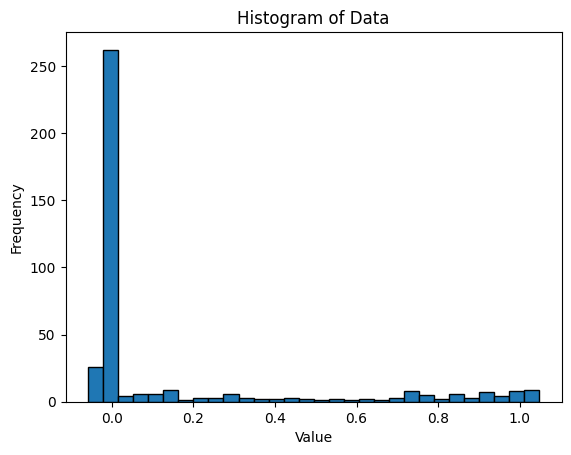

In [14]:
plt.hist(X[0], bins=30, edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Data")
plt.show()

In [181]:
def plot_first_x_images(arr: np.ndarray, image_size=2) -> None:
    digits = arr.reshape(-1, 20, 20)
    num_images = digits.shape[0]

    grid_size = int(np.ceil(np.sqrt(num_images)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(image_size, image_size))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            # transpose, because if not transposed, the image will be shown
            # reflected along the diagonal
            ax.imshow(digits[i].T, cmap="Greys", interpolation=None)
            ax.axis("off")
        else:
            ax.axis("off")  # Hide any extra subplots

    plt.tight_layout()
    plt.show()

# EDA

checking that the X's corresponding to their actual y's


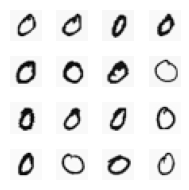

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype=uint8)

In [16]:
samples = X[:16]
plot_first_x_images(samples)
display(y[:16].flatten())

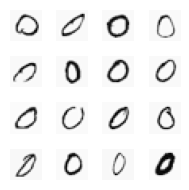

In [17]:
tests = mnist_df.drop(columns=["y"])
plot_first_x_images(tests.iloc[100:116].to_numpy())

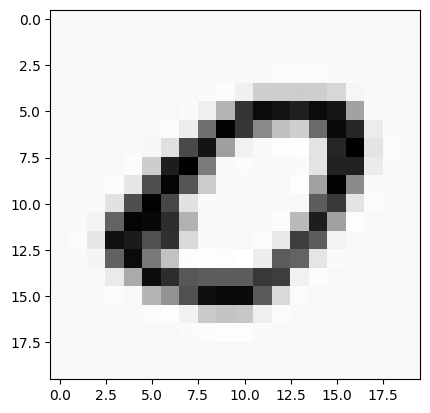

In [18]:
plt.imshow(X[0].reshape((20, 20)), cmap="Greys", interpolation=None)
plt.show()

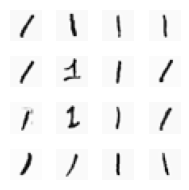

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [19]:
samples = X[500:516]
plot_first_x_images(samples)
display(y[500:516].flatten())

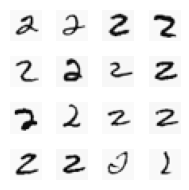

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint8)

In [20]:
samples = X[1000:1016]
plot_first_x_images(samples)
display(y[1000:1016].flatten())

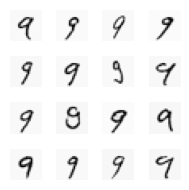

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=uint8)

In [21]:
digit = 9
idx_lower = digit * 500
idx_upper = idx_lower + 16
samples = X[idx_lower:idx_upper]
plot_first_x_images(samples)
display(y[idx_lower:idx_upper].flatten())

# Activation Function


In [22]:
def sigmoid(z: ndarray | float) -> ndarray:
    """
    Args:
        z (np.ndarray | float): Net Internal Activity of the neuron
    """

    return 1 / (1 + np.exp(-z))

In [23]:
def sigmoid_prime(z: ndarray | float) -> ndarray | float:
    """This assumes that z is already the activation, i.e. already went through normal sigmoid

    Args:
        z (ndarray | float): activation
    """
    return z * (1 - z)

## Tests for the activaton function


In [24]:
# should be 0.49000133312003097
print("tests for logistic function")
res10 = sigmoid(z=-0.04)
print(res10)
# 0.2499000266606
res10_prime = sigmoid_prime(z=-0.04)
print(res10_prime)
print("------------")

tests for logistic function
0.4900013331200346
-0.041600000000000005
------------


# Overview of the Main Formulas

The weight adjustment is proportional to the instantaneous gradient:
$$ \Delta {w}_{ji}(n) = -\eta \frac{\partial \mathcal{L}(n)}{\partial w_{ji}(n)} $$

---

## Local Gradients / local errors / small delta $δ$

$δ$ refers to the local gradients computed per neuron which can then be reused in the computation of the gradients for the previous layers.

### Gradient (for output neurons):

$$\frac{\partial \mathcal{L}(n)}{\partial w_{j i}(n)}=\frac{\partial \mathcal{L}(n)}{\partial e_j(n)} \frac{\partial e_j(n)}{\partial y_j(n)} \frac{\partial y_j(n)}{\partial v_j(n)} \frac{\partial v_j(n)}{\partial w_{j i}(n)}$$

Computing for the partial derivatives, we get:  
$$\frac{\partial \mathcal{L}(n)}{\partial w_{j i}(n)}=-e_j(n) \varphi^{\prime}\left(v_j(n)\right) y_i(n)$$

However, a portion of the formula can be reused for the calculations of the gradients of the layers before the current layer, we call this term $\delta$, it also happens that $\delta$ kind of acts like a local error:  
$$\delta_j(n)=e_j(n) \varphi^{\prime}\left(v_j(n)\right)$$

For example, for the sigmoid function, this is what we get for $\delta$:  
$$\delta_j(n)= e_j \cdot o_j(n) \cdot [ 1- o_j(n) ]$$
where $$ \varphi^{\prime}\left(v_j(n)\right) = o_j(n) \cdot [ 1- o_j(n) ]$$

We also get the formula for the weight adjustment:

$$\Delta {w}_{ji}(n) = \eta {\delta_j}^{(l)}(n) {y_i}^{(l-1)}(n)$$

---

### Gradient (for hidden neurons):

$$\delta_j(n)= \varphi^{\prime} (v_j) \sum_k {\delta_k}^{(l+1)} {w_{kj}}^{(l+1)} $$


## Formula for Error Computation

The instantaneous sum of square errors $\mathcal{L}(n)$ of the network is

$$
\mathcal{L}(n) = \frac{1}{2} \sum_{j \in C} {e_j}^2(n)
$$

where $C$ is the set of all output neurons of the network. and $e =  y - \hat{y}$ where $\hat{y}$ is the predicted output

---

# General Formula (Eror computation):

For the N input patterns in the training set, the average squared error for the entire training set is

$$
  \mathcal{L}_{av}  =  \frac {1}{N}  \sum _ {n=1}^ {N}  \mathcal{L}  (n)=  \frac {1}{2N}  \sum _ {n=1}^ {N}  \sum  {e_{j}}^{2} (n)
$$


# Main Code: Artificial Neural Network

Construct a fully connected artificial neural networks with three layers. The first layer (the input
layer) has 400+1 nodes, the second layer (the hidden layer) has 25+1 nodes (you may change 25
to a different value if needed), and the last layer (the output layer) has 10 nodes corresponding
to the ten digits


In [109]:
class MLP:
    """Multilayer Perceptron"""

    def __init__(
        self,
        layer_sizes: Optional[list[int]] = None,
        random_seed: float = 1,
    ) -> None:
        np.random.seed(random_seed)

        self.layer_sizes = [400, 25, 10] if not layer_sizes else layer_sizes

        self.weights = [
            # + 1 to account for the bias
            # e.g. 25 x 400 (25 neurons, 400 weights each)
            np.random.randn(right_layer_neurons, left_layer_weights + 1)
            for (right_layer_neurons, left_layer_weights) in zip(
                self.layer_sizes[1:], self.layer_sizes[:-1]
            )
        ]
        self.mse_train = []
        self.acc_train = []
        self.mse_val = []
        self.acc_val = []
        self.saved_weights = []

    def display_network_info(self) -> None:
        for idx, weight in enumerate(self.weights):
            print(f"--- {idx+1}th layer: ")
            print(
                f"""shape: {weight.shape}, {weight.shape[0]} neurons
                    with {weight.shape[1] - 1} weights and 1 bias each"""
            )

        print("(Note: the first weight accounts for the bias)")

    def predict(self, X: ndarray):
        """Assumes that the input for X, and y is a single row of data

        Args:
            X (ndarray): single row of training data / single example

        Returns:
            _type_: prediction for its class label
        """
        y_out = self.forward(X=X)[-1]

        return np.argmax(y_out)

    def forward_all_training_examples(self, X: ndarray) -> ndarray:
        """In contrast to `forward`, this method performs a forward pass
        for all the training data, not just a single training example.

        Args:
            X (ndarray): All training data, e.g. of shape (4250, 400)

        Returns:
            ndarray: np array of the predictions for all the training examples in X
        """

        y_hats = []
        for x in X:
            y_hat = self.predict(X=x)
            y_hats.append(y_hat)

        y_hats = np.array(y_hats)
        return y_hats

    def forward(self, X: ndarray) -> list[ndarray]:
        """Perform a forward pass from the input layer to the output layer

        Args:
            X (ndarray): Data for the input neurons (assumed to be one training example)
                         e.g. of shape (400, )
            debug (bool, optional)

        Returns:
            list[ndarray]: activations for all the layers (input to output)
        """
        # a -> activation
        a = X.copy()
        activations = []

        for idx, layer_weight in enumerate(self.weights):
            if idx == 0:
                # append 1 to account for the bias
                # this also makes it so that they both have the same shapes
                a = sigmoid(np.dot(layer_weight, np.append(1, X)))
            else:
                a = sigmoid(np.dot(layer_weight, np.append(1, a)))
            activations.append(a)
        return activations

    def backward(
        self, y_train: ndarray, activations: list[ndarray], X: ndarray
    ) -> list[ndarray]:
        """Perform one backpropagation pass.
        Loops through all of the activations in reverse (i.e. starting from the output)
        then calculates the local gradients (δ) and the change in weights (Δw)

        Note that the local gradient is calculated differently depending on if the layer
        is a hidden or output layer.

        Args:
            y_train (ndarray): class labels for the training data
            activations (list[ndarray]): activations for all of the layers
                                   excluding the input layer (hidden to output)
            X (ndarray): Input pixels
        """
        output_activations = activations[-1]
        weights = self.weights.copy()
        weights.reverse()
        activations.reverse()

        num_output_neurons = len(output_activations)
        one_hot = np.zeros(num_output_neurons)  # desired outputs
        one_hot[int(y_train.item())] = 1

        # e = d - y
        output_error = one_hot - output_activations

        small_deltas = []  # δ
        Deltas: list[ndarray] = []
        for idx, activation in enumerate(activations):
            # calculate the local gradients
            if idx == 0:
                # for the output layer, δ = e * φ'
                small_delta = output_error * sigmoid_prime(z=activation)
                small_deltas.append(small_delta)

            else:
                # for hidden layers, δ = φ' * Σ [δ^(l+1) *w^(l+1) ]
                # [:,1:] removes the biasing term, w_0 from the dot product
                # note that the summation can be computed as a dot produt
                small_delta = np.dot(
                    # idx - 1 refers to the deltas and weights @ the next layer
                    # or if going from output to input, the "previous" layer
                    small_deltas[idx - 1],
                    weights[idx - 1][:, 1:],
                ) * sigmoid_prime(z=activation)
                small_deltas.append(small_delta)

            # Calculate weights adjustments, large Delta
            # Δw (weight adjustments) = eta * (δ * y), where small delta is a vector and, y is a vector,
            # therefore we perform an outer product to get all of the weight adjustments
            # In reference to their layers: Δw = eta * (δ(l) * y(l-1))
            if idx == (len(activations) - 1):
                # Input layer, 1 accounts for the bias
                Delta = self.eta * np.outer(small_delta, np.append(1, X))
                Deltas.append(Delta)
            else:
                # hidden to output layers
                Delta = self.eta * np.outer(
                    small_delta, np.append(1, activations[idx + 1])
                )
                Deltas.append(Delta)

        # reverse the deltas since we calculated them backwards
        Deltas.reverse()

        assert len(self.weights) == len(Deltas)
        assert all(
            [
                np.array(weight).shape == np.array(Delta).shape
                for weight, Delta in zip(self.weights, Deltas)
            ]
        )

        return Deltas

    def SGD_fit(
        self,
        eta: float,
        epochs: int,
        X_train: ndarray,
        y_train: ndarray,
        X_validation: ndarray,
        y_validation: ndarray,
        save_weights_after_n_epochs: Optional[int] = None,
        mini_batch_size=8,
        debug=False,
    ):
        """Entry point method from which NN training starts.
        The method shuffles the training data each epoch, then partitions
        the data into mini-batches in order to perform Stochastic Gradient Descent

        The forward and backward passes are done using the `process_mini_batch` method

        Args:
            eta (float): learning rate
            epochs (int): number of training epochs
            X_train (ndarray): training features
            y_train (ndarray): training target
            X_validation (ndarray): validation set
            y_validation (ndarray): validation target
            mini_batch_size (int, optional): number of training examples per mini batch
            debug (bool, optional)
        """
        self.eta = eta
        train_x = X_train.copy()
        train_y = y_train.copy()
        validation_x = X_validation.copy()
        validation_y = y_validation.copy()

        training_data = list(zip(train_y, train_x))
        for nth_epoch in range(epochs + 1):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[i : i + mini_batch_size]
                for i in range(0, len(training_data), mini_batch_size)
            ]

            for mini_batch in mini_batches:
                self.process_mini_batch(mini_batch=mini_batch)

                if debug:
                    break

            y_hats_train = self.forward_all_training_examples(X=train_x)
            y_hats_val = self.forward_all_training_examples(X=validation_x)

            mse_train = mean_squared_error(y_true=train_y, y_pred=y_hats_train)
            acc_train = accuracy_score(train_y, y_hats_train)
            mse_val = mean_squared_error(validation_y, y_hats_val)
            acc_val = accuracy_score(validation_y, y_hats_val)

            print(f"-------- Epoch: {nth_epoch} / {epochs}")
            print(f"MSE train: {mse_train}")
            print(f"acc train: {acc_train}")
            print(f"acc val: {acc_val}")
            self.mse_train.append(mse_train)
            self.acc_train.append(acc_train)
            self.mse_val.append(mse_val)
            self.acc_val.append(acc_val)

            # save weights if arg is provided
            if nth_epoch == save_weights_after_n_epochs:
                self.saved_weights = self.weights

    def process_mini_batch(self, mini_batch: list[tuple]) -> None:
        """Loop through each of the training examples from the mini batch,
        perform the forward and backward passes.
        The backward pass would result in a list of ndarrays of the
        Delta weights per layer (This is done for each training example in the mini batch)

        The Delta weights are then collected, and the mean calculated across
        all the training examples in the mini batch

        The weights are then updated using the calculated mean of the Delta weights

        Args:
            mini_batch (list[tuple]): Partitioned mini batch from SGD_fit
        """
        mini_batch_deltas: list[list[ndarray]] = []

        for y_train, X_train in mini_batch:
            y_out = self.forward(X=X_train)

            Delta_weights = self.backward(y_train=y_train, activations=y_out, X=X_train)
            mini_batch_deltas.append(Delta_weights)

        # mini batch deltas = list
        # 8 (weight changes), i.e. 8 weight items, each item is a list
        # each list contains the delta weights per layer
        # if you have 1 hidden layer, then that would be 2 delta weights
        # 1 for the hidden layer, 1 for the output layer
        transposed_mini_deltas = list(zip(*mini_batch_deltas))
        # the final transposed mini deltas is of the shape of something like
        # (8, 25, 401) or (8, 10, 26) -> (mini_batch_size, num_neurons, num_weights)
        transposed_mini_deltas = [np.array(dw) for dw in transposed_mini_deltas]

        # calc the mean of the weight updates across all training
        # examples in the mini batch
        Delta_weights_means = [
            np.mean(layer_deltas_in_mini_batch, axis=0)
            for layer_deltas_in_mini_batch in transposed_mini_deltas
        ]

        assert all(
            [
                weight.shape == Delta.shape
                for weight, Delta in zip(self.weights, Delta_weights_means)
            ]
        )

        self.update_weights(Deltas=Delta_weights_means)

    def update_weights(self, Deltas: list[ndarray]) -> None:
        """
        Args:
            Deltas (list[ndarray]): the change in weights calculated from backprop
        """
        self.weights = [weight + Delta for weight, Delta in zip(self.weights, Deltas)]

    def load_weights(self, weights: list[ndarray]) -> None:
        assert len(self.weights) == len(weights)
        self.weights = weights

# MLP Instance


In [127]:
network_a_hyperparams = {
    "layer_sizes": [400, 25, 10],
    "eta": 0.12,
    "epochs": 100,
    "mini_batch_size": 12,
}

network_a = MLP(layer_sizes=network_a_hyperparams["layer_sizes"], random_seed=33)
network_a.display_network_info()

# network = MLP(layer_sizes=[400, 25, 25, 10])
network_a.SGD_fit(
    eta=network_a_hyperparams["eta"],
    epochs=network_a_hyperparams["epochs"],
    X_train=X_train.to_numpy(),
    y_train=y_train.to_numpy(),
    X_validation=X_val.to_numpy(),
    y_validation=y_val.to_numpy(),
    mini_batch_size=network_a_hyperparams["mini_batch_size"],
    save_weights_after_n_epochs=30,
    # debug=True,
)

--- 1th layer: 
shape: (25, 401), 25 neurons
                    with 400 weights and 1 bias each
--- 2th layer: 
shape: (10, 26), 10 neurons
                    with 25 weights and 1 bias each
(Note: the first weight accounts for the bias)
-------- Epoch: 0 / 100
MSE train: 16.382
acc train: 0.13514285714285715
acc val: 0.144
-------- Epoch: 1 / 100
MSE train: 14.443428571428571
acc train: 0.21857142857142858
acc val: 0.24066666666666667
-------- Epoch: 2 / 100
MSE train: 13.610285714285714
acc train: 0.2714285714285714
acc val: 0.2866666666666667
-------- Epoch: 3 / 100
MSE train: 12.331142857142858
acc train: 0.30914285714285716
acc val: 0.31666666666666665
-------- Epoch: 4 / 100
MSE train: 11.516571428571428
acc train: 0.34485714285714286
acc val: 0.3566666666666667
-------- Epoch: 5 / 100
MSE train: 10.399142857142857
acc train: 0.37857142857142856
acc val: 0.392
-------- Epoch: 6 / 100
MSE train: 9.517714285714286
acc train: 0.424
acc val: 0.428
-------- Epoch: 7 / 100
MSE train

## Training curves

Train the ANN for at least 100 iterations (epochs). Plot the loss function versus the number of
epochs. This should show convergence to a small squared loss value over the epochs.


In [29]:
def plot_training_curves(arr1: list, arr2: list, label1: str, label2: str, metric: str):
    x_range = list(range(len(arr1)))
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(x_range, arr1, label=label1)
    ax.plot(x_range, arr2, label=label2)
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric)
    ax.legend()

    fig.show()

In [155]:
def plot_conf_matrix(conf_matrix: ndarray):
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

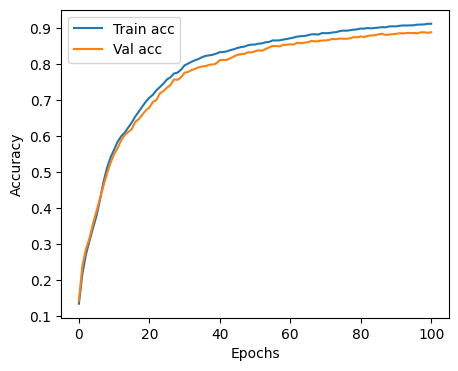

In [128]:
plot_training_curves(
    arr1=network_a.acc_train,
    arr2=network_a.acc_val,
    label1="Train acc",
    label2="Val acc",
    metric="Accuracy",
)

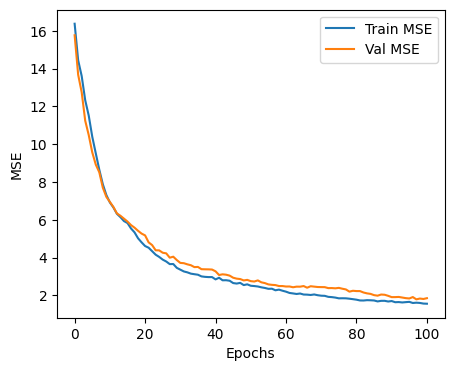

In [129]:
plot_training_curves(
    arr1=network_a.mse_train,
    arr2=network_a.mse_val,
    label1="Train MSE",
    label2="Val MSE",
    metric="MSE",
)

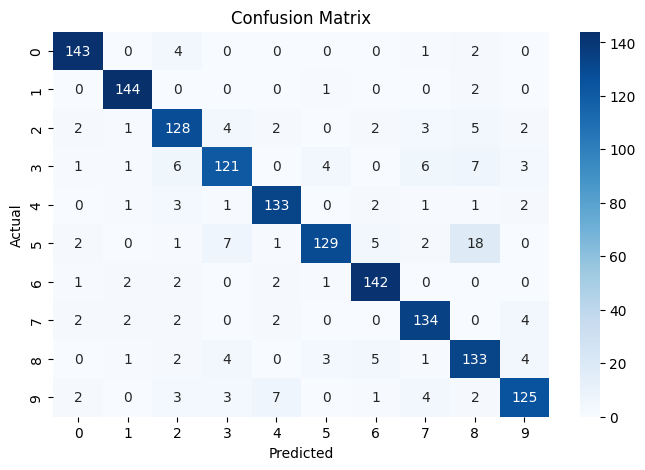

In [157]:
preds_a = network_a.forward_all_training_examples(X_val.to_numpy())
conf_matrix = confusion_matrix(y_val, preds_a)

plot_conf_matrix(conf_matrix=conf_matrix)

## Testing the network's predictions

Testing the network with weights loaded just before the network starts overfittings, vs the last trained weights


In [122]:
saved_weights_net_a = network_a.saved_weights

network_loaded_weights = MLP(layer_sizes=[400, 25, 10])
network_loaded_weights.load_weights(saved_weights_net_a)

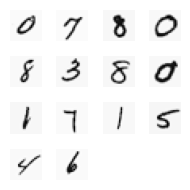

In [123]:
plot_first_x_images(X_val.iloc[6:20].to_numpy())

In [124]:
preds_test = network_a.forward_all_training_examples(X_val.iloc[6:20].to_numpy())
preds_test_loaded = network_loaded_weights.forward_all_training_examples(
    X_val.iloc[6:20].to_numpy()
)
display(preds_test)
display(preds_test_loaded)
display(y_val.iloc[6:20].to_numpy().flatten())

array([0, 7, 8, 0, 8, 3, 8, 0, 1, 7, 1, 5, 4, 6])

array([0, 7, 8, 0, 8, 3, 3, 0, 1, 7, 1, 5, 4, 6])

array([0., 7., 8., 0., 8., 3., 8., 0., 1., 7., 1., 5., 4., 6.])

(25, 401)

(25, 400)

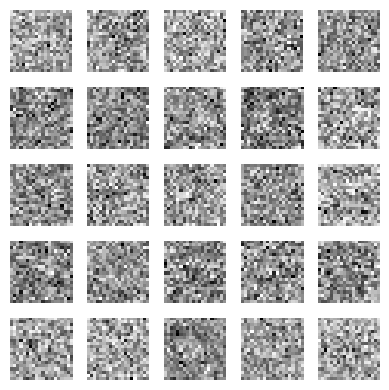

In [196]:
# 25 x 401
viz_weights_net_a = network_a.weights[0]
display(viz_weights_net_a.shape)
viz_weights_net_a = viz_weights_net_a[:, 1:]  # remove bias
display(viz_weights_net_a.shape)

plot_first_x_images(viz_weights_net_a, image_size=4)

# Improving the performance of the network

Trying a different set of hyperparameters

Discuss the backpropagation process in the ANN. Compute the classification error rate of your ANN as the percentage of incorrect classification. Can you improve this error rate by changing the values of the parameters used in the ANN?


In [158]:
network_b_hyperparams = {
    "layer_sizes": [400, 25, 10],
    "eta": 0.7,
    "epochs": 100,
    "mini_batch_size": 4,
}

network_b = MLP(layer_sizes=network_b_hyperparams["layer_sizes"], random_seed=33)
network_b.display_network_info()

network_b.SGD_fit(
    eta=network_b_hyperparams["eta"],
    epochs=network_b_hyperparams["epochs"],
    X_train=X_train.to_numpy(),
    y_train=y_train.to_numpy(),
    X_validation=X_val.to_numpy(),
    y_validation=y_val.to_numpy(),
    mini_batch_size=network_b_hyperparams["mini_batch_size"],
    save_weights_after_n_epochs=23,
)

--- 1th layer: 
shape: (25, 401), 25 neurons
                    with 400 weights and 1 bias each
--- 2th layer: 
shape: (10, 26), 10 neurons
                    with 25 weights and 1 bias each
(Note: the first weight accounts for the bias)
-------- Epoch: 0 / 100
MSE train: 6.3742857142857146
acc train: 0.6274285714285714
acc val: 0.6053333333333333
-------- Epoch: 1 / 100
MSE train: 3.640285714285714
acc train: 0.7934285714285715
acc val: 0.7806666666666666
-------- Epoch: 2 / 100
MSE train: 2.637714285714286
acc train: 0.8448571428571429
acc val: 0.8353333333333334
-------- Epoch: 3 / 100
MSE train: 1.9665714285714286
acc train: 0.8774285714285714
acc val: 0.856
-------- Epoch: 4 / 100
MSE train: 1.7582857142857142
acc train: 0.8945714285714286
acc val: 0.8753333333333333
-------- Epoch: 5 / 100
MSE train: 1.5842857142857143
acc train: 0.9071428571428571
acc val: 0.8853333333333333
-------- Epoch: 6 / 100
MSE train: 1.558857142857143
acc train: 0.9108571428571428
acc val: 0.888
----

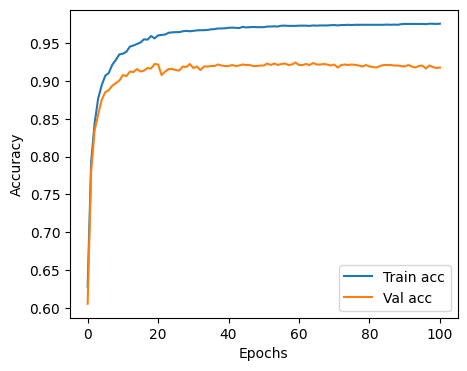

In [159]:
plot_training_curves(
    arr1=network_b.acc_train,
    arr2=network_b.acc_val,
    label1="Train acc",
    label2="Val acc",
    metric="Accuracy",
)

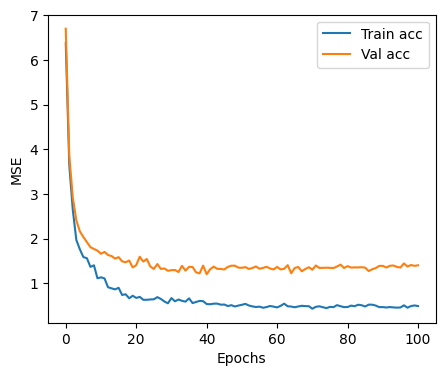

In [226]:
plot_training_curves(
    arr1=network_b.mse_train,
    arr2=network_b.mse_val,
    label1="Train acc",
    label2="Val acc",
    metric="MSE",
)

## Testing the improved network


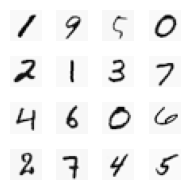

array([1, 9, 5, 0, 2, 1, 3, 7, 4, 6, 0, 6, 2, 7, 4, 5])

array([1, 9, 5, 0, 2, 1, 3, 7, 4, 6, 0, 6, 3, 7, 4, 5])

array([1., 9., 5., 0., 2., 1., 3., 7., 4., 6., 0., 6., 2., 7., 4., 5.])

In [172]:
X_vals_for_testing = X_val.iloc[40:56].to_numpy()

saved_weights_net_b = network_b.saved_weights

network_loaded_weights_b = MLP(layer_sizes=[400, 25, 10])
network_loaded_weights_b.load_weights(saved_weights_net_b)

plot_first_x_images(X_vals_for_testing)

preds_test_b = network_b.forward_all_training_examples(X_vals_for_testing)
preds_test_loaded_b = network_loaded_weights_b.forward_all_training_examples(
    X_vals_for_testing
)
display(preds_test_b)
display(preds_test_loaded_b)
display(y_val.iloc[40:56].to_numpy().flatten())

## Confusion Matrix


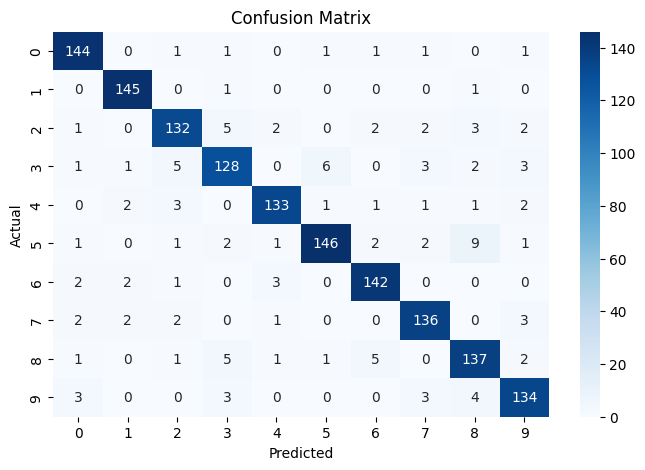

In [162]:
preds_b = network_b.forward_all_training_examples(X_val.to_numpy())
conf_matrix = confusion_matrix(y_val, preds_b)

plot_conf_matrix(conf_matrix=conf_matrix)

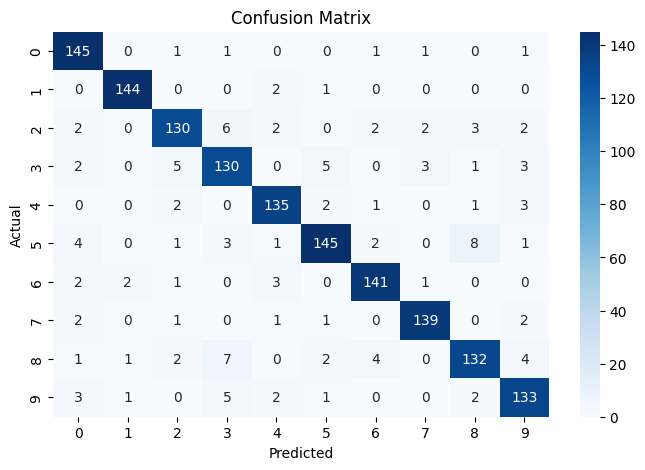

In [163]:
preds_loaded_b = network_loaded_weights_b.forward_all_training_examples(
    X_val.to_numpy()
)
conf_matrix_loaded_b = confusion_matrix(y_val, preds_loaded_b)

plot_conf_matrix(conf_matrix=conf_matrix_loaded_b)

## Visualizing the learned representations


(25, 401)

(25, 400)

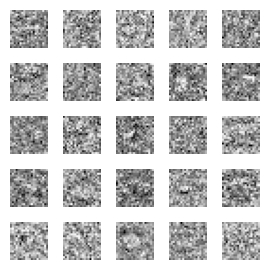

In [201]:
# 25 x 401
viz_weights_net_b = network_b.weights[0]
display(viz_weights_net_b.shape)
viz_weights_net_b = viz_weights_net_b[:, 1:]  # remove bias
display(viz_weights_net_b.shape)

plot_first_x_images(viz_weights_net_b, image_size=2.8)

# MLP Forward pass test

Ignore everything below (only used to check that the NN works as expected)


In [35]:
l1_weights = np.array(
    [
        [-0.7, 0.1, 0.4, -0.6],
        [-0.8, 0.3, 0.7, -0.4],
        [-0.9, -0.9, 0.3, -0.6],
        [-0.4, -0.8, 0.7, 0.2],
    ]
)

l2_weights = np.array(
    [
        [-0.7, -0.3, 0.8, -0.9, 0.4],
        [-0.6, -0.4, -0.2, 0.7, -0.3],
        [0.4, 0.4, -0.7, 0.8, -0.3],
    ]
)

out_weights = np.array([[-0.6, 0.8, -0.3, 0.7], [-0.4, -0.6, 0.7, 0.3]])

display(l1_weights.shape)
display(l2_weights.shape)
display(out_weights.shape)

(4, 4)

(3, 5)

(2, 4)

In [36]:
testing = MLP(layer_sizes=[3, 4, 3, 2])
testing.load_weights(weights=[l1_weights, l2_weights, out_weights])
testing.display_network_info()

--- 1th layer: 
shape: (4, 4), 4 neurons
                    with 3 weights and 1 bias each
--- 2th layer: 
shape: (3, 5), 3 neurons
                    with 4 weights and 1 bias each
--- 3th layer: 
shape: (2, 4), 2 neurons
                    with 3 weights and 1 bias each
(Note: the first weight accounts for the bias)


## backward test


In [223]:
all_activations = testing.forward(X=[0.4, 0.5, -0.7])
# Deltas_weightsss = testing.backward(
#     y_train=np.ndarray([]), activations=all_activations, X=[0.4, 0.5, -0.7]
# )
# should equal 0.5019898612 and 0.4476699584
# all_activations

In [224]:
# # Deltas_weightsss
# testing.update_weights(Deltas=Deltas_weightsss)
# testing.weights

In [225]:
test_eta = 0.85
# test_eta = 1

yy_small_delta_test = [0.08200124, 0.07228198]
y_minus_one = np.array([0.35261812, 0.31599562, 0.6009481])
zzz = test_eta * np.outer(yy_small_delta_test, np.append(1, y_minus_one))
zzz

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])